# Yedgaon Total Water Level Prediction

#### Brief: 
The present work aims at developing a model for reservoir operation using Machine Learning tools in the Kukadi project of Maharashtra State, India. In this study, the data sets at five different stations located in Kukadi Project are used. Kukadi Irrigation Project envisages cluster of 5 major dams (named Dimbhe, Manikdoh, Wadaj, Pimplgaojoge and Yedgaon) having irrigation potential of 155056 Ha with annual 943.98 Mm3 (33.33 TMC) water utilization. The Yedgaon dam is like pick up weir having its own yield and storage. It receives water from Dimbhe (though DLBC), Wadaj (through MLBC), Manikdoh (through river) and through Pimpalgaojoge (through river).

#### Problem Statement: 
The aim of the present work is develop a model to estimate the total water level at Manikdoh, Wadaj, Dimbhe and Pimpalgaojoge dams to estimate the same at Yedgaon and analyze the results.

#### Objective: 
Development of model using the TWL values at upstream (Manikdoh, Wadaj, Dimbhe, Pimpalgaojoge) stations and downstream (Yedgaon) station.
Comparison of the results using various soft computing tools i.e. actual values and predicted values at Yedgaon dam.


#### Dataset: 
TWL Data values was obtained from the Irrigation Department, Narayangaon from 1st June 2015 to 31st August 2019 each for Manikdoh, Dimbhe, Wadaj, Pimplgaojoge and Yedgaon for Kukadi Irrigation Project. 
The total no. of observations for daily discharge data available for each station is 1548.

#### Methodology:
The project follows the process: Data Gathering, Exploratory Data Analysis, Feature Engineering and finally Machine Learning. The model is developed using Linear Regression, Decision Tree Regressor, KNN Regression, Support Vector Machine and Random Forest. Further, Concluding by the results in terms of R2.

# Importing the Libraries

In [77]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Reading the Data

In [78]:
import pandas as pd
data = pd.read_csv('TWL Data.csv')

In [79]:
data.head()

,Manikdoh,Wadaj,Dimbhe,Pjoge,Yedgaon
0,686.54,707.55,691.45,681.50,636.16
1,686.53,707.53,691.45,681.47,636.14
2,686.52,707.52,691.45,681.44,636.12
3,686.51,707.50,691.45,681.41,636.10
4,686.50,707.49,691.35,681.38,636.08


# Preliminary Investigation

In [80]:
data.info

<bound method DataFrame.info of       Manikdoh   Wadaj  Dimbhe   Pjoge  Yedgaon
0       686.54  707.55  691.45  681.50   636.16
1       686.53  707.53  691.45  681.47   636.14
2       686.52  707.52  691.45  681.44   636.12
3       686.51  707.50  691.45  681.41   636.10
4       686.50  707.49  691.35  681.38   636.08
...        ...     ...     ...     ...      ...
1543    708.45  717.53  719.14  686.25   639.50
1544    708.37  717.53  719.14  686.25   639.41
1545    708.30  717.53  719.06  686.23   639.39
1546    708.17  717.53  719.00  686.22   639.37
1547    708.00  717.48  718.95  686.22   639.44

[1548 rows x 5 columns]>

In [81]:
data.describe()

,Manikdoh,Wadaj,Dimbhe,Pjoge,Yedgaon
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,694.953721,712.572351,705.306539,682.564561,638.184813
std,8.728239,4.437512,11.838471,3.316840,1.883337
min,681.750000,699.690000,682.550000,673.010000,634.220000
25%,686.850000,709.222500,696.680000,681.377500,636.540000
50%,693.165000,713.375000,707.620000,683.345000,638.160000
75%,704.180000,716.820000,716.975000,685.230000,639.940000
max,709.990000,717.530000,719.150000,686.620000,641.000000


In [82]:
data.isnull().sum()

Manikdoh    0
Wadaj       0
Dimbhe      0
Pjoge       0
Yedgaon     0
dtype: int64

In [83]:
data = data.drop_duplicates()

In [84]:
data.dtypes

Manikdoh    float64
Wadaj       float64
Dimbhe      float64
Pjoge       float64
Yedgaon     float64
dtype: object

In [85]:
data.shape

(1543, 5)

# Exploratory Data Analysis

In [86]:
import matplotlib.pyplot as plt

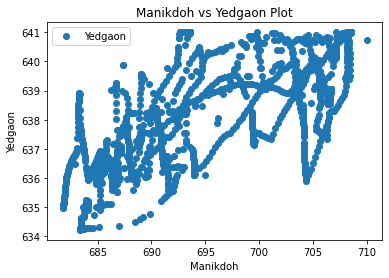

In [87]:
data.plot(x='Manikdoh', y='Yedgaon', style='o')
plt.title('Manikdoh vs Yedgaon Plot')
plt.xlabel('Manikdoh')
plt.ylabel('Yedgaon')
plt.show()

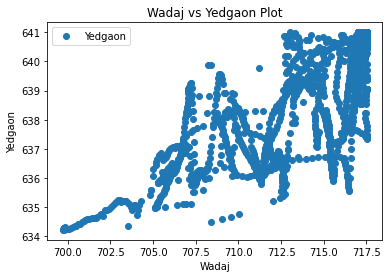

In [88]:
data.plot(x='Wadaj', y='Yedgaon', style='o')
plt.title('Wadaj vs Yedgaon Plot')
plt.xlabel('Wadaj')
plt.ylabel('Yedgaon')
plt.show()

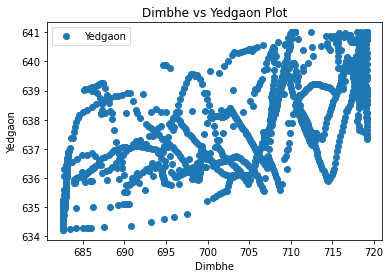

In [89]:
data.plot(x='Dimbhe', y='Yedgaon', style='o')
plt.title('Dimbhe vs Yedgaon Plot')
plt.xlabel('Dimbhe')
plt.ylabel('Yedgaon')
plt.show()

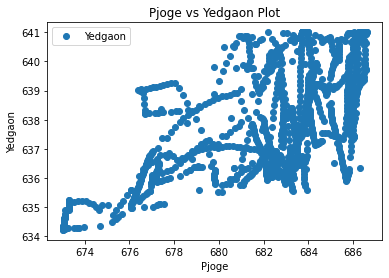

In [90]:
data.plot(x='Pjoge', y='Yedgaon', style='o')
plt.title('Pjoge vs Yedgaon Plot')
plt.xlabel('Pjoge')
plt.ylabel('Yedgaon')
plt.show()

In [91]:
data.corr()

,Manikdoh,Wadaj,Dimbhe,Pjoge,Yedgaon
Manikdoh,1.000000,0.811601,0.908733,0.787526,0.702082
Wadaj,0.811601,1.000000,0.939233,0.885911,0.738039
Dimbhe,0.908733,0.939233,1.000000,0.905392,0.720240
Pjoge,0.787526,0.885911,0.905392,1.000000,0.652807
Yedgaon,0.702082,0.738039,0.720240,0.652807,1.000000


In [92]:
data.columns

Index(['Manikdoh', 'Wadaj', 'Dimbhe', 'Pjoge', 'Yedgaon'], dtype='object')

# Train Test Split

In [93]:
X = data[['Manikdoh','Wadaj', 'Dimbhe', 'Pjoge']].values #array of features
y = data['Yedgaon'].values #array of targets

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [95]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [96]:
X_train.shape, X_test.shape

((1234, 4), (309, 4))

In [97]:
y_train.shape, y_test.shape

((1234,), (309,))

# Model Development

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### 1. Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [100]:
coeff_df = pd.DataFrame(regressor.coef_,['Manikdoh','Wadaj', 'Dimbhe', 'Pjoge'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Manikdoh,0.725217
Wadaj,1.186030
Dimbhe,-0.327367
Pjoge,-0.097152


In [101]:
regressor.intercept_

638.1773743922205

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,634.76,635.303902
1,639.40,639.242743
2,636.77,637.478872
3,634.48,634.977526
4,636.13,636.413245
...,...,...
304,637.20,639.391890
305,635.91,636.500465
306,637.00,637.932486
307,636.36,636.701725


In [103]:
df.corr()

,Actual,Predicted
Actual,1.000000,0.764801
Predicted,0.764801,1.000000


In [104]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5844072614629789


# Feature Selection

In [105]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Manikdoh','Wadaj', 'Dimbhe', 'Pjoge'],selector.support_))

[('Manikdoh', True), ('Wadaj', True), ('Dimbhe', True), ('Pjoge', False)]

# Cross Validation

In [106]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [107]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

-0.4140639782227603

### 2. Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train, y_train)
dt.predict(X_test)

array([634.69, 639.14, 636.77, 634.44, 636.07, 638.09, 639.18, 641.  ,
       640.98, 641.  , 637.83, 638.06, 636.48, 639.15, 637.53, 638.06,
       634.28, 639.13, 634.22, 636.39, 641.  , 638.8 , 641.  , 636.74,
       638.13, 637.7 , 638.75, 638.37, 640.1 , 641.  , 639.09, 635.79,
       640.99, 636.09, 637.19, 638.23, 635.86, 640.48, 639.52, 638.65,
       636.14, 635.94, 635.33, 635.66, 638.04, 640.4 , 637.04, 636.04,
       639.94, 640.99, 640.83, 638.29, 636.51, 639.99, 636.23, 640.28,
       638.83, 636.07, 635.99, 639.22, 635.11, 640.34, 639.24, 636.95,
       637.5 , 640.62, 635.95, 640.82, 636.09, 640.55, 637.14, 640.1 ,
       640.38, 637.67, 639.43, 640.82, 640.  , 635.54, 639.02, 639.02,
       639.5 , 636.25, 638.85, 639.31, 637.66, 641.  , 640.41, 636.06,
       636.4 , 641.  , 640.76, 640.36, 635.17, 636.52, 635.95, 636.11,
       635.98, 637.35, 639.33, 640.52, 636.34, 636.04, 641.  , 636.74,
       636.34, 634.28, 637.49, 638.81, 636.67, 639.09, 638.99, 637.89,
      

In [109]:
from sklearn.metrics import  r2_score

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set R2 of dt: 0.96


- Inference: The model built on Decision Tree Regressor Analysis gives an accuracy of 82%

### 3. KNN Regression

In [110]:
for i in range(5,150):
    KN = KNeighborsRegressor(n_neighbors = i)
    KN.fit(X_train, y_train)
    print("Training for {}th Neighbor: ".format(i), KN.score(X_test,y_test))

Training for 5th Neighbor:  0.977635245068715
Training for 6th Neighbor:  0.9755185796646852
Training for 7th Neighbor:  0.9727689713944033
Training for 8th Neighbor:  0.9668799623152732
Training for 9th Neighbor:  0.9647954465430574
Training for 10th Neighbor:  0.9612789860812324
Training for 11th Neighbor:  0.9584264551723255
Training for 12th Neighbor:  0.9557023207459007
Training for 13th Neighbor:  0.9529132211313714
Training for 14th Neighbor:  0.9490248691326567
Training for 15th Neighbor:  0.943936307622237
Training for 16th Neighbor:  0.9381606875086071
Training for 17th Neighbor:  0.9340193943039082
Training for 18th Neighbor:  0.9290366067653003
Training for 19th Neighbor:  0.9258652185727804
Training for 20th Neighbor:  0.9216770498179321
Training for 21th Neighbor:  0.9183723053423376
Training for 22th Neighbor:  0.9146114294246015
Training for 23th Neighbor:  0.9101841317855058
Training for 24th Neighbor:  0.9062326273335413
Training for 25th Neighbor:  0.9027329256263289

- Inference: The model built on KNN Regression Analysis gives an accuracy of 97.76%

### 4. Support Vector Machine

In [111]:
for k in np.arange(0.01,5,0.5):
    SV = SVR(C=k, gamma = 'auto')
    SV.fit(X_train,y_train)
    print("for c = ", k)
    print("Training Score: ", SV.score(X_train, y_train))
    print("Testing Score: ", SV.score(X_test, y_test))

for c =  0.01
Training Score:  0.30929844893101177
Testing Score:  0.32443664048750775
for c =  0.51
Training Score:  0.9488815711129666
Testing Score:  0.9665159630498598
for c =  1.01
Training Score:  0.967805031610697
Testing Score:  0.9761381141009966
for c =  1.51
Training Score:  0.9749159213169957
Testing Score:  0.9792943011024379
for c =  2.01
Training Score:  0.978427695321836
Testing Score:  0.9809649809898835
for c =  2.51
Training Score:  0.9807976198165506
Testing Score:  0.9819614683377456
for c =  3.01
Training Score:  0.9826943225250448
Testing Score:  0.9831912503413065
for c =  3.51
Training Score:  0.9837527917722321
Testing Score:  0.9838114424907146
for c =  4.01
Training Score:  0.9847089697625381
Testing Score:  0.9843850877826718
for c =  4.51
Training Score:  0.9855354807912122
Testing Score:  0.9850879000862532


- Inference: The model built on Support Vector Machine Analysis gives an accuracy of 32.44%

### 5. Random Forest

In [112]:
dict = {}
for i in range(3,15):
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(X_train, y_train)
    dict[i] = {'tr': rf.score(X_train, y_train), 'te':rf.score(X_test, y_test)}
    print("for max depth = ", i)
    print("Training score: ", rf.score(X_train, y_train))
    print("Testing score: ", rf.score(X_test, y_test))

for max depth =  3
Training score:  0.7525136393678146
Testing score:  0.7280622486034024
for max depth =  4
Training score:  0.8358913830904191
Testing score:  0.8107144379294599
for max depth =  5
Training score:  0.8922821682225008
Testing score:  0.8752998690365955
for max depth =  6
Training score:  0.9319809852382682
Testing score:  0.916196183864148
for max depth =  7
Training score:  0.9554915547134336
Testing score:  0.9374676075443746
for max depth =  8
Training score:  0.972082411605437
Testing score:  0.9520671531221289
for max depth =  9
Training score:  0.9824261422360484
Testing score:  0.9612291635610924
for max depth =  10
Training score:  0.9883100257708013
Testing score:  0.9672783433000595
for max depth =  11
Training score:  0.9910052662805399
Testing score:  0.9706406642213046
for max depth =  12
Training score:  0.9925821849772323
Testing score:  0.9702325537203879
for max depth =  13
Training score:  0.9936928348809786
Testing score:  0.9731691262190636
for max 

- Inference: The model built on Random Forest Analysis gives an accuracy of 97.36% 

# Conclusion

Considering all the accuracy values given by all the five models, it is observed that Random Forest Model and KNN Regression Model performed with the best accuracy of 97%.